In [2]:
# from glmhmm import *
import numpy as np
import sys
sys.path.append('/data/users/weixuan/work/model')
print(sys.path)
from fitting import *
from analysis import permute_states

['/data/users/weixuan/work/model/glmhmm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python38.zip', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/lib-dynload', '', '/home/wliu25/.local/lib/python3.8/site-packages', '/data/users/weixuan/work/model/ssm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/setuptools/_vendor', '/data/users/weixuan/work/model']


/home/wliu25/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# init = 3
# lls_all = np.zeros((init, 250))
# A_all = np.zeros((init, 2, 2))
# w_all = np.zeros((init, 2, 2, 1))
# pi0_all = np.zeros((init, 2))
# for i in range(init):
#   print(f'-----------------init {i}-----------------')
#   model_pred = GLMHMM(num_data, 2, 1, 1)
#   A=model_pred.transition_matrix
#   w=model_pred.w
#   lls,A,w,pi0 = model_pred.fit(Y,X,A,w, fit_init_states=True)
#   lls_all[i] = lls
#   A_all[i] = A
#   w_all[i] = w
#   pi0_all[i] = pi0

In [ ]:
# hmm = ssm.HMM(2, 1, M=1, transitions="inputdriven")
# hmm_lls = hmm.fit(Y, inputs=X, method="em", num_iters=100, init_method="kmeans")

NameError: name 'ssm' is not defined

In [ ]:
# hmm.transitions.Ws, np.exp(hmm.transitions.log_Ps)

In [ ]:
# hmm = ssm.HMM(2, 1)
# hmm_lls = hmm.fit(Y, method="em", num_iters=100, init_method="kmeans")
# hmm.transitions.transition_matrix

In [ ]:
def find_best_fit(lls):
    cleaned_lls = lls[~np.isnan(lls).all(axis=1)]
    assert len(cleaned_lls) != 0
    return np.argmax(np.nanmax(cleaned_lls,axis=1))

In [ ]:
# bestidx = find_best_fit(lls_all) # run several times (several inti) and get the best one
# A_pred = A_all[bestidx]
# w_pred = w_all[bestidx]
# pi0_pred = pi0_all[bestidx]

AssertionError: 

In [ ]:
model_true = GLMHMM(num_data, 2, 1, 1) #N, n_states, n_features, n_outputs
model_true.transition_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

In [ ]:
#N = 500, 1000, n_state = 3, n_features(x_d)=?4?7? same as agent, n_output(dim(y))=2(same as agent)
# w is of shape self.n_states, self.n_features + 1, self.n_outputs
# w in R^{n_features + 1 x n_states}

# Easy Level (2 hidden states)

In [ ]:
N=500
K=2
D=
dim_output=2

SyntaxError: invalid syntax (847896653.py, line 3)

In [ ]:
w_low, w_high = -1, 1
div_pt = np.linspace(w_low, w_high, K+1)
w_true = np.zeros((K, D, dim_output))
for d in range(D):
    #k=0 -> neg
    #k=1 -> pos
    for k in range(K):
        w_true[k, d, :] = np.random.uniform(low=div_pt[k], high=div_pt[k+1], \
                size = dim_output)

# bias <- 0s
w_true = np.pad(w_true, ((0, 0), (0, 1), (0, 0)), mode='constant')
w_true

array([[[-0.98909084, -0.41517378],
        [-0.10672708, -0.83068545],
        [ 0.        ,  0.        ]],

       [[ 0.65705309,  0.7194833 ],
        [ 0.00624008,  0.83855491],
        [ 0.        ,  0.        ]]])

In [ ]:
model_true = GLMHMM(N, K, D, dim_output) #N, n_states, n_features, n_outputs
# A_true = np.array([[0.85., 0.15], [0.1, 0.9]])
# model_true.transition_matrix = A_true
model_true.w = w_true

A_true = model_true.transition_matrix
w_true = model_true.w

X, Y, states = model_true.generate_data(N)

In [ ]:
A_true

array([[0.93631782, 0.06368218],
       [0.55300659, 0.44699341]])

In [ ]:
Y, states

(array([[ 4.35761464e-01,  4.76074825e-02],
        [ 1.89183295e-01,  2.25869048e-02],
        [ 7.83755316e-01,  9.19558856e-01],
        [ 3.32547789e-01,  5.85178437e-01],
        [-2.07013437e-01,  7.20722028e-01],
        [ 2.93614341e-02, -2.37437085e-01],
        [ 9.11641698e-01,  6.79211686e-01],
        [ 5.26246643e-01,  3.35343483e-01],
        [ 6.10333711e-01,  6.16324162e-01],
        [-3.24346079e-01, -6.80297030e-01],
        [-1.77963649e-01,  3.06049780e-01],
        [ 4.37584601e-01,  5.49347766e-01],
        [ 7.99043183e-01, -1.53180564e-03],
        [ 5.59130247e-01,  5.65704718e-01],
        [ 8.33315614e-01,  7.52725351e-01],
        [-7.54331469e-01, -3.02897444e-02],
        [ 5.37302240e-01, -1.85297471e-01],
        [ 1.63905588e-01,  4.89565548e-01],
        [ 5.44176795e-01,  5.85320271e-01],
        [ 1.39329814e-01,  8.10919966e-01],
        [ 5.01702724e-01,  2.79872343e-01],
        [ 3.11124495e-01, -9.64166403e-02],
        [ 1.19759822e-01,  6.163

In [ ]:
phi = np.zeros((N, K))#(N, K)
X_augmented = np.hstack([X, np.ones((X.shape[0], 1))])
for k in range(K):
    thetak = model_true.dist_param(w_true[k], X_augmented) # calculate theta
    print(thetak)
    for t in range(N):
        phi[t,k] = model_true.dist_pdf(Y[t], thetak[t], otherparamk=model_true.covariances[k]) # calculate phi


[[ 3.89941318e-01  6.81249062e-02]
 [ 1.54996564e-01  2.55910720e-02]
 [ 7.69267167e-01  9.12834760e-01]
 [ 2.80836101e-01  5.70437677e-01]
 [-1.89879325e-01  7.42083092e-01]
 [-2.67909255e-02 -2.17844638e-01]
 [ 9.14385436e-01  7.03554389e-01]
 [ 5.09203089e-01  3.32723036e-01]
 [ 6.28120407e-01  5.79203563e-01]
 [-3.14220388e-01 -6.63498213e-01]
 [-1.79722466e-01  3.42364364e-01]
 [ 4.78618725e-01  4.90197075e-01]
 [ 8.18318053e-01  4.25686862e-02]
 [ 5.71046549e-01  5.38924041e-01]
 [ 8.71637914e-01  7.72637075e-01]
 [-7.15733782e-01 -4.08062149e-02]
 [ 5.47988373e-01 -1.89175931e-01]
 [ 1.34705514e-01  4.66764092e-01]
 [ 5.12605796e-01  6.04796721e-01]
 [ 1.87095223e-01  8.29548804e-01]
 [ 5.09558323e-01  2.99909437e-01]
 [ 3.01369303e-01 -1.75284705e-01]
 [ 1.08446614e-01  5.87182817e-01]
 [ 7.13042445e-01  6.86117404e-01]
 [ 7.77599196e-01  4.10997451e-01]
 [ 6.98756401e-01 -1.46228559e-01]
 [ 1.27645680e-01  8.61156727e-01]
 [ 1.60682712e-01  3.53674938e-01]
 [ 2.77229432e-01  4

In [ ]:
phi

array([[4.51347739e+001, 1.52864478e-102],
       [8.83229004e+001, 9.36903931e-164],
       [1.40094648e+002, 0.00000000e+000],
       [3.74941116e+001, 4.89575755e-019],
       [1.09392439e+002, 3.22160246e-249],
       [2.71506905e+001, 0.00000000e+000],
       [1.17899266e+002, 0.00000000e+000],
       [1.37167593e+002, 7.67586600e-012],
       [6.82191628e+001, 1.47022663e-042],
       [1.31303742e+002, 0.00000000e+000],
       [8.21837012e+001, 6.99968187e-217],
       [1.19242769e+001, 9.53609940e-002],
       [4.99834132e+001, 4.28081913e-220],
       [1.03573007e+002, 2.15641678e-016],
       [6.26360202e+001, 0.00000000e+000],
       [7.14994265e+001, 0.00000000e+000],
       [1.49195909e+002, 2.83836156e-222],
       [8.01261960e+001, 4.76778322e-048],
       [7.99857254e+001, 1.34411807e-021],
       [4.27596223e+001, 1.46693805e-221],
       [1.26252063e+002, 6.35476354e-020],
       [6.76803311e+000, 8.04670831e-198],
       [9.74945145e+001, 6.73960710e-069],
       [5.7

In [ ]:
ll_s,alpha_s,_,cs_s = model_true.forwardPass(Y,A_true,phi,pi0=model_true.pi0)
# ll_s, alpha_s, cs_s
ll_s

phi[i] [4.06841983e-89 7.60899267e+01]
alpha_prior[i] [0.29435684 0.70564316]
pxz [1.19756720e-89 5.36923365e+01]
cs[i] 53.692336549291795
alpha[i] [2.23042481e-91 1.00000000e+00]
phi[i] [ 0.         93.68176596]
alpha_prior[i] [0.29435684 0.70564316]
pxz [ 0.         66.10589762]
cs[i] 66.10589762457745
alpha[i] [0. 1.]
phi[i] [1.97017919e-112 5.78527104e+000]
alpha_prior[i] [0.29435684 0.70564316]
pxz [5.79935716e-113 4.08233695e+000]
cs[i] 4.082336954232719
alpha[i] [1.42059737e-113 1.00000000e+000]
phi[i] [3.06542825e-18 4.39713476e+01]
alpha_prior[i] [0.29435684 0.70564316]
pxz [9.02329765e-19 3.10280808e+01]
cs[i] 31.02808079409628
alpha[i] [2.90810692e-20 1.00000000e+00]
phi[i] [6.75239312e-81 4.80661489e+00]
alpha_prior[i] [0.29435684 0.70564316]
pxz [1.98761308e-81 3.39175493e+00]
cs[i] 3.3917549328813252
alpha[i] [5.86013176e-82 1.00000000e+00]
phi[i] [2.02560095e-280 3.59561431e+001]
alpha_prior[i] [0.29435684 0.70564316]
pxz [5.96249490e-281 2.53722065e+001]
cs[i] 25.372206

1901.3642659854547

In [ ]:
model_pred = GLMHMM(N, K, D, dim_output, fit=True)
A=model_pred.transition_matrix
w=model_pred.w
A, w, model_pred.covariances

(array([[0.72121943, 0.27878057],
        [0.32525816, 0.67474184]]),
 array([[[-0.71619717,  0.17980338],
         [ 0.9090475 , -0.75950128],
         [ 1.        ,  1.        ]],
 
        [[ 0.43223864, -0.72746671],
         [-0.88386542,  0.50782283],
         [ 1.        ,  1.        ]]]),
 array([[[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]]]))

In [ ]:
# n_states = 2
# A = np.random.gamma(1*np.ones((n_states, n_states)) + 5*np.identity(n_states),1)
# A = A/np.repeat(np.reshape(np.sum(A,axis=1),(1, n_states)),n_states,0).T

In [ ]:
A

array([[0.72121943, 0.27878057],
       [0.32525816, 0.67474184]])

In [ ]:
lls,A,w,pi0 = model_pred.fit(Y,X,A,w, fit_init_states=True) 

theta[t] [0.89196875 0.55448585]
y[t] [0.43576146 0.04760748]
phi[t,k] 0.12613500822913717
theta[t] [0.82279469 0.62630063]
y[t] [0.1891833 0.0225869]
phi[t,k] 0.10851749241134016
theta[t] [0.32571139 0.93846301]
y[t] [0.78375532 0.91955886]
phi[t,k] 0.1432795203936584
theta[t] [0.50020697 0.85467279]
y[t] [0.33254779 0.58517844]
phi[t,k] 0.15133710152239152
theta[t] [-0.41121057  0.95312643]
y[t] [-0.20701344  0.72072203]
phi[t,k] 0.15171808183668065
theta[t] [0.84727375 0.53700877]
y[t] [ 0.02936143 -0.23743709]
phi[t,k] 0.0843947115393883
theta[t] [0.95158049 0.62980759]
y[t] [0.9116417  0.67921169]
phi[t,k] 0.15883410244819948
theta[t] [0.85394454 0.66981071]
y[t] [0.52624664 0.33534348]
phi[t,k] 0.14262960465773813
theta[t] [0.79895081 0.76879272]
y[t] [0.61033371 0.61632416]
phi[t,k] 0.15454211935326648
theta[t] [0.92137949 0.20297305]
y[t] [-0.32434608 -0.68029703]
phi[t,k] 0.049594458372362246
theta[t] [0.31584435 0.85259118]
y[t] [-0.17796365  0.30604978]
phi[t,k] 0.1213405788

In [ ]:
lls

array([-1035.6741347 ,  -938.54401816,   296.179269  ,   312.05570513,
         362.16641463,   467.62716585,   581.66241502,   550.80191327,
         513.06510165,   481.49188576,   456.8515429 ,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [ ]:
A, model_true.transition_matrix

(array([[9.99999711e-01, 2.88568912e-07],
        [6.25568361e-01, 3.74431639e-01]]),
 array([[0.93631782, 0.06368218],
        [0.55300659, 0.44699341]]))

In [ ]:
w_true, w

(array([[[-0.98909084, -0.41517378],
         [-0.10672708, -0.83068545],
         [ 0.        ,  0.        ]],
 
        [[ 0.65705309,  0.7194833 ],
         [ 0.00624008,  0.83855491],
         [ 0.        ,  0.        ]]]),
 array([[[-0.96417131, -0.39773451],
         [-0.10321127, -0.77197317],
         [-0.00426873, -0.03467166]],
 
        [[ 0.59796281,  0.61364224],
         [-0.05422384,  0.72405932],
         [-0.03972564, -0.05519717]]]))

In [ ]:
model_pred.mostprob_states(X, Y), states

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
pred_states = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
states = np.array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

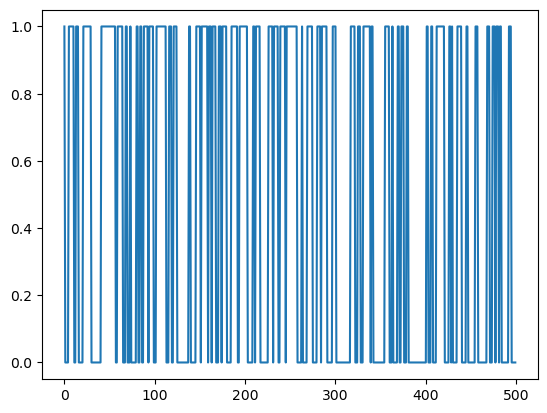

In [ ]:
plt.plot(range(len(states)), states)

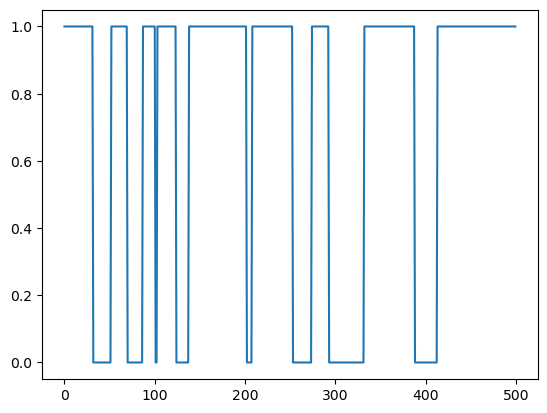

In [ ]:
plt.plot(range(len(pred_states)), pred_states)

In [ ]:
N=500
K=3
D=4
dim_output=2



In [ ]:
for k in 